### 활성화함수
- 입력에 일정 값을 곱해서 출력값을 결정하는 것(실제 신경망의 동작을 모방)
- 종류 : step function, sigmoid, tanh, relu

Step Function:계단함수
- 0보다 크면 1이고 그렇지 않으면 0인 함수

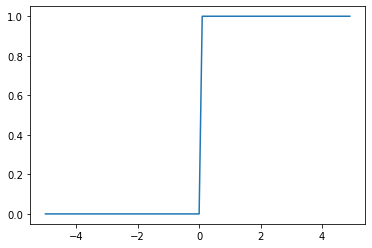

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
    return np.array(x > 0,dtype=np.int)

x = np.arange(-5.0,5.0,0.1)
y = step_function(x)

plt.plot(x,y)

# 미분하면 값이 0이되기 때문에 활성화함수로 사용할 수 없음

sigmoid 함수

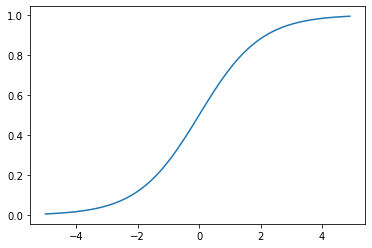

In [10]:
def sigmoid_function(x):
    return 1 / (1 +np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid_function(x)
plt.plot(x,y)

sigmoid 미분

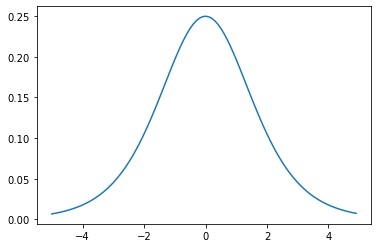

In [9]:
def d_sigmoid_function(x):
    return sigmoid_function(x) * (1 - sigmoid_function(x))

x = np.arange(-5.0,5.0,0.1)
y = d_sigmoid_function(x)

plt.plot(x,y)

tanh (하이퍼볼릭 탄젠트)

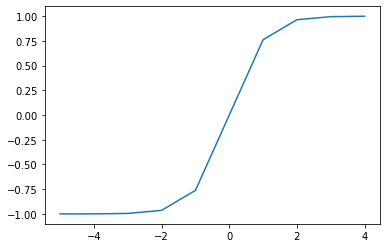

In [11]:
x = np.arange(-5.0,5.0,1)
y = np.tanh(x)

plt.plot(x,y)

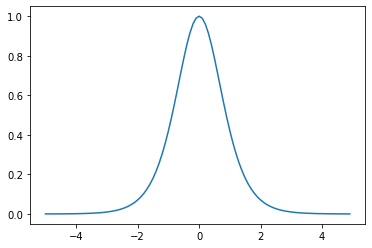

In [12]:
def d_tanh_function(x):
    return(1+np.tanh(x))*(1-np.tanh(x))

x = np.arange(-5.0,5.0,0.1)
y = d_tanh_function(x)

plt.plot(x,y)

relu

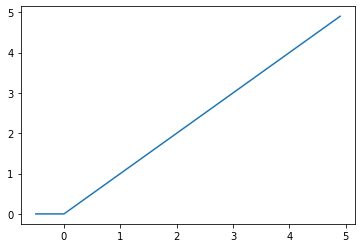

In [13]:
def relu_function(x):
    # 0보다 작으면 0, 0보다 크면 원래 값을 그대로 출력
    return np.maximum(0,x)

x = np.arange(-0.5,5.0,0.1)
y = relu_function(x)

plt.plot(x,y)

- relu는 미분하면 0 이하의 값은 0이 나옴
- 그 이상의 값은 1이 나옴
- 미분값이 1이 나오기때문에 기울기 소실의 문제가 발생하지 않음
- 기울기 소실을 해결

딥러닝이 처음 등장했을때 3가지 문제
- 과대적합 > dropout으로 해결(일부 파라미터만 사용)
- 기울기 소실 > relu로 해결
- 연산량 증가 > 그래픽 카드의 성능


# 비용함수
- 분류: 교차엔트로피오차(CEE)
- 회귀: 평균제곱오차(MSE)

In [15]:
# y : 실제값
# t : 예측값
def mean_squared_error_function(y,t):#실제값과 예측값의 차이
    return 0.5*np.sum((y-t) **2)

# 정답 레이블과 예측값이 일치하는 경우
y= np.array([0 , 0 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 ])
t= np.array([0.1 , 0.05 , 0.6 , 0.0 , 0.05 , 0.1 , 0.0 , 0.1 , 0.0 , 0.0])

print(mean_squared_error_function(y,t))

0.09750000000000003


In [17]:
# 정답 레이블과 예측값이 일치하지 않는 경우
y = np.array([0 , 0 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 ])
t = np.array([0.1 , 0.05 , 0.1 , 0.0 , 0.05 , 0.1 , 0.0 , 0.6 , 0.0 , 0.0])

print(mean_squared_error_function(y,t))

0.5975


교차 엔트로피 오차(CEE):분류

In [19]:
def cross_entropy_error_function(y,t):
    # log값에서 y = 0이면 log값이 무한대가 됨
    #아주 작은값을 더해줌
    return - np.sum(t * np.log(y + 1e-7))
# 정답 레이블과 예측값이 일치하는 경우
y= np.array([0 , 0 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 ])
t= np.array([0.1 , 0.05 , 0.6 , 0.0 , 0.05 , 0.1 , 0.0 , 0.1 , 0.0 , 0.0])

print(cross_entropy_error_function(y,t))

6.447238200383332


In [20]:
# 정답 레이블과 예측값이 일치하지 않는 경우
y = np.array([0 , 0 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 ])
t = np.array([0.1 , 0.05 , 0.1 , 0.0 , 0.05 , 0.1 , 0.0 , 0.6 , 0.0 , 0.0])

print(cross_entropy_error_function(y,t))

14.50628607586249


In [21]:
#분류에서 cross_entropy를 사용한다

In [22]:
# 1. 방향의 문제가 없다 RMSProp
# 2. 방향의 문제가 있다. Adam